In [12]:
from google.colab import files # √∫p file t·ª´ m√°y t√≠nh l√™n colab
uploaded = files.upload()

Saving model .pkl to model .pkl


# T√≠nh u·ªëng ƒë∆∞·ª£c c·ªßa n∆∞·ªõc

Trong b·∫£ng ph√¢n t√≠ch n√†y em ƒë√£ kh√°m ph√° b·ªô d·ªØ li·ªáu Water Potability t·ª´ Kaggle, b·ªô d·ªØ li·ªáu n√†y g·ªìm 3276 m·ª•c d·ªØ li·ªáu v√† 9 ƒë·∫∑c tr∆∞ng quy·∫øt ƒë·ªãnh t√≠nh u·ªëng ƒë∆∞·ª£c c·ªßa n∆∞·ªõc. M·ªôt ph·∫ßn gi·∫£i th√≠ch chi ti·∫øt v·ªÅ c√°c ƒë·∫∑c tr∆∞ng n√†y c√≥ th·ªÉ ƒë∆∞·ª£c t√¨m th·∫•y tr√™n trang Kaggle c·ªßa b·ªô d·ªØ li·ªáu.

Ph√¢n t√≠ch b·∫Øt ƒë·∫ßu v·ªõi ph√¢n t√≠ch d·ªØ li·ªáu kh√°m ph√° (EDA) ƒë·ªÉ hi·ªÉu v·ªÅ ph√¢n b·ªë d·ªØ li·ªáu, c√°c ch·ªâ s·ªë th·ªëng k√™ v√† ch·∫•t l∆∞·ª£ng d·ªØ li·ªáu.Em nh·∫≠n th·∫•y r·∫±ng kho·∫£ng 11% d·ªØ li·ªáu l√† ngo·∫°i lai v√† kho·∫£ng 44% d·ªØ li·ªáu b·ªã thi·∫øu gi√° tr·ªã. ƒê·ªÉ chu·∫©n b·ªã d·ªØ li·ªáu cho vi·ªác m√¥ h√¨nh h√≥a, em ƒë√£ th·ª±c hi·ªán quy tr√¨nh ti·ªÅn x·ª≠ l√Ω nhi·ªÅu b∆∞·ªõc g·ªìm:

* X·ª≠ l√Ω ngo·∫°i lai b·∫±ng ph∆∞∆°ng ph√°p IQR capping ƒë·ªÉ gi·∫£m ·∫£nh h∆∞·ªüng c·ªßa c√°c gi√° tr·ªã c·ª±c ƒëoan.

* B√π gi√° tr·ªã thi·∫øu b·∫±ng thu·∫≠t to√°n k-L√°ng gi·ªÅng g·∫ßn nh·∫•t (kNN).

* ƒê·ªÉ m√¥ h√¨nh h√≥a, t√¥i ƒë√£ tri·ªÉn khai hai b·ªô ph√¢n lo·∫°i h·ªçc m√°y:

* Support Vector Machine (SVM): Tr∆∞·ªõc khi b√π gi√° tr·ªã thi·∫øu, t√¥i √°p d·ª•ng RobustScaler ƒë·ªÉ gi·∫£m ·∫£nh h∆∞·ªüng c·ªßa c√°c gi√° tr·ªã ngo·∫°i lai trong qu√° tr√¨nh chu·∫©n h√≥a.

* Random Forest: V√¨ c√°c m√¥ h√¨nh d·ª±a tr√™n c√¢y √≠t nh·∫°y c·∫£m h∆°n v·ªõi vi·ªác chu·∫©n h√≥a, t√¥i kh√¥ng chu·∫©n h√≥a d·ªØ li·ªáu cho m√¥ h√¨nh n√†y.

** M·ª•c ti√™u ƒë·ªì √°n **

D·ª± ƒëo√°n t√≠nh u·ªëng ƒë∆∞·ª£c c·ªßa n∆∞·ªõc d·ª±a tr√™n c√°c ƒë·∫∑c tr∆∞ng nh∆∞ :
pH, ƒë·ªô c·ª©ng, ch·∫•t r·∫Øn, chloramines, sulfate, ƒë·ªô d·∫´n ƒëi·ªán, carbon h·ªØu c∆°, trihalomethanes, v√† ƒë·ªô ƒë·ª•c.





# Import c√°c th∆∞ vi·ªán ƒë·ªÉ Ph·ª•c v·ª• cho vi·ªác Ph√¢n t√≠ch

In [13]:
# M√¥ ƒëun c∆° b·∫£n
import numpy as np
import pandas as pd

# Tr·ª±c quan h√≥a d·ªØ li·ªáu
import matplotlib.pyplot as plt
import seaborn as sns

# Ph√¢n t√≠ch th·ªëng k√™
import scipy.stats as stats
from scipy.stats import skew

# Chu·∫©n h√≥a d·ªØ li·ªáu & x·ª≠ l√Ω thi·∫øu
from sklearn.preprocessing import  RobustScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

# s·ª≠ d·ª•ng m√¥ h√¨nh h·ªçc m√°y
from sklearn import svm
from sklearn.svm import SVC

# ƒë√°nh gi√° m√¥ h√¨nh
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score,  recall_score
from sklearn.model_selection import validation_curve


# RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# v·∫Ω c√¢y quy·∫øt ƒë·ªãnh
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings('ignore') # ƒê·ªÉ ·∫©n c√°c c·∫£nh b√°o trong qu√° tr√¨nh ch·∫°y code,cho notebook g·ªçn g√†ng.

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1) Download data

In [15]:
df = pd.read_csv('water_potability.csv')  # ƒë·ªçc file dataset upload t·ª´ m√°y t√≠nh l√™n

### a) Th√¥ng tin chung v√† th√¥ng tin th·ªëng k√™

In [16]:
df.head() # COI TR∆Ø·ªöC 5 D√íNG ƒê·∫¶U TI√äN

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [17]:
# In ra th√¥ng tin t·ªïng qu√°t v·ªÅ dataframe: s·ªë d√≤ng, s·ªë c·ªôt, ki·ªÉu d·ªØ li·ªáu, gi√° tr·ªã thi·∫øu.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


* B·ªô d·ªØ li·ªáu ch·ª©a 3.276 h√†ng v√† 10 c·ªôt
* C√≥ nh·ªØng gi√° tr·ªã b·ªã thi·∫øu trong c√°c c·ªôt pH, sulfate v√† trihalomethanes.

### b) Th·ªëng k√™ ph√¢n b·ªë nh√£n


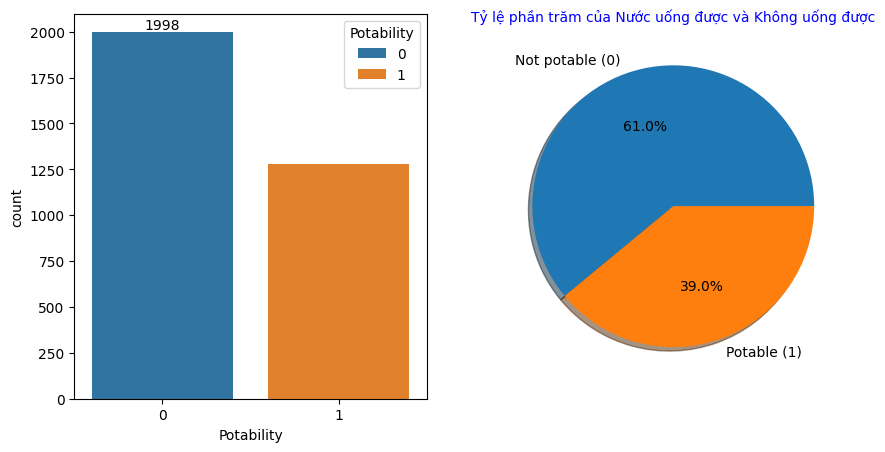

In [18]:
# Counting the number of classes in Rain

fig, ax = plt.subplots(1,2,figsize=(10,5))

# Bi·ªÉu ƒë·ªì bar plot (c·ªôt)
# Use the original 'Potability' column for the countplot
ax = sns.countplot(data=df, x="Potability",ax=ax[0], hue = "Potability")
ax.bar_label(ax.containers[0])

#pie plot (bi·ªÉu ƒë·ªì tr√≤n)
# S·ª≠ d·ª•ng value_counts() ƒë·ªÉ ƒë·∫øm s·ªë li·ªáu c·ªôt 'Potibility'
# G√°n nh√£n cho c√°c gi√° tr·ªã: 0 l√† 'Kh√¥ng u·ªëng ƒë∆∞·ª£c', 1 l√† 'U·ªëng ƒë∆∞·ª£c'
potability_counts = df['Potability'].value_counts()
potability_labels = {0: 'Not potable (0)', 1: 'Potable (1)'}
# Apply the mapping to the index of the value counts Series
potability_counts.index = potability_counts.index.map(potability_labels)

# Plot the pie chart using the re-indexed value counts
potability_counts.plot.pie(autopct='%1.1f%%', shadow=True, textprops={'fontsize': 10}, ylabel='')

plt.title('T·ª∑ l·ªá ph·∫ßn trƒÉm c·ªßa N∆∞·ªõc u·ªëng ƒë∆∞·ª£c v√† Kh√¥ng u·ªëng ƒë∆∞·ª£c', fontsize=10 ,color = 'blue')
plt.show() # Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì

### c) Ph√¢n b·ªë th√¥ng tin

In [19]:
# Ph√¢n t√≠ch th√¥ng tin
# Theo m·∫∑c ƒë·ªãnh, Pandas b·ªè qua gi√° tr·ªã NaN khi t√≠nh to√°n th·ªëng k√™ m√¥ t·∫£.
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000


* ƒê·ªëi v·ªõi Ch·∫•t r·∫Øn, s·ª± kh√°c bi·ªát gi·ªØa gi√° tr·ªã t·ªëi thi·ªÉu v√† t·ªëi ƒëa l√™n t·ªõi ba c·∫•p ƒë·ªô so v·ªõi c√°c c·ªôt kh√°c.
  
* C√°c bi·∫øn c√≥ ph·∫°m vi kh√°c nhau; C·ª• th·ªÉ, t√≠nh nƒÉng ch·∫•t r·∫Øn c√≥ ph·∫°m vi gi√° tr·ªã l·ªõn h∆°n ƒë√°ng k·ªÉ so v·ªõi ph·∫ßn c√≤n l·∫°i.

* B·∫±ng c√°ch so s√°nh gi√° tr·ªã trung b√¨nh v√† trung b√¨nh (ph·∫ßn trƒÉm th·ª© 50), ch√∫ng t√¥i quan s√°t m·ªôt kho·∫£ng c√°ch nh·ªè gi·ªØa ch√∫ng trong c·ªôt r·∫Øn, cho th·∫•y s·ª± ph√¢n ph·ªëi sai l·ªách t√≠ch c·ª±c. Ng∆∞·ª£c l·∫°i, c√°c c·ªôt c√≤n l·∫°i th·ªÉ hi·ªán c√°c ph√¢n ph·ªëi gi·ªëng nh∆∞ Gaussian, v√¨ s·ª± kh√°c bi·ªát gi·ªØa ph∆∞∆°ng ti·ªán v√† trung v·ªã c·ªßa ch√∫ng l√† t·ªëi thi·ªÉu.


The following distribution plots support the last three observations.

### d) Visualization

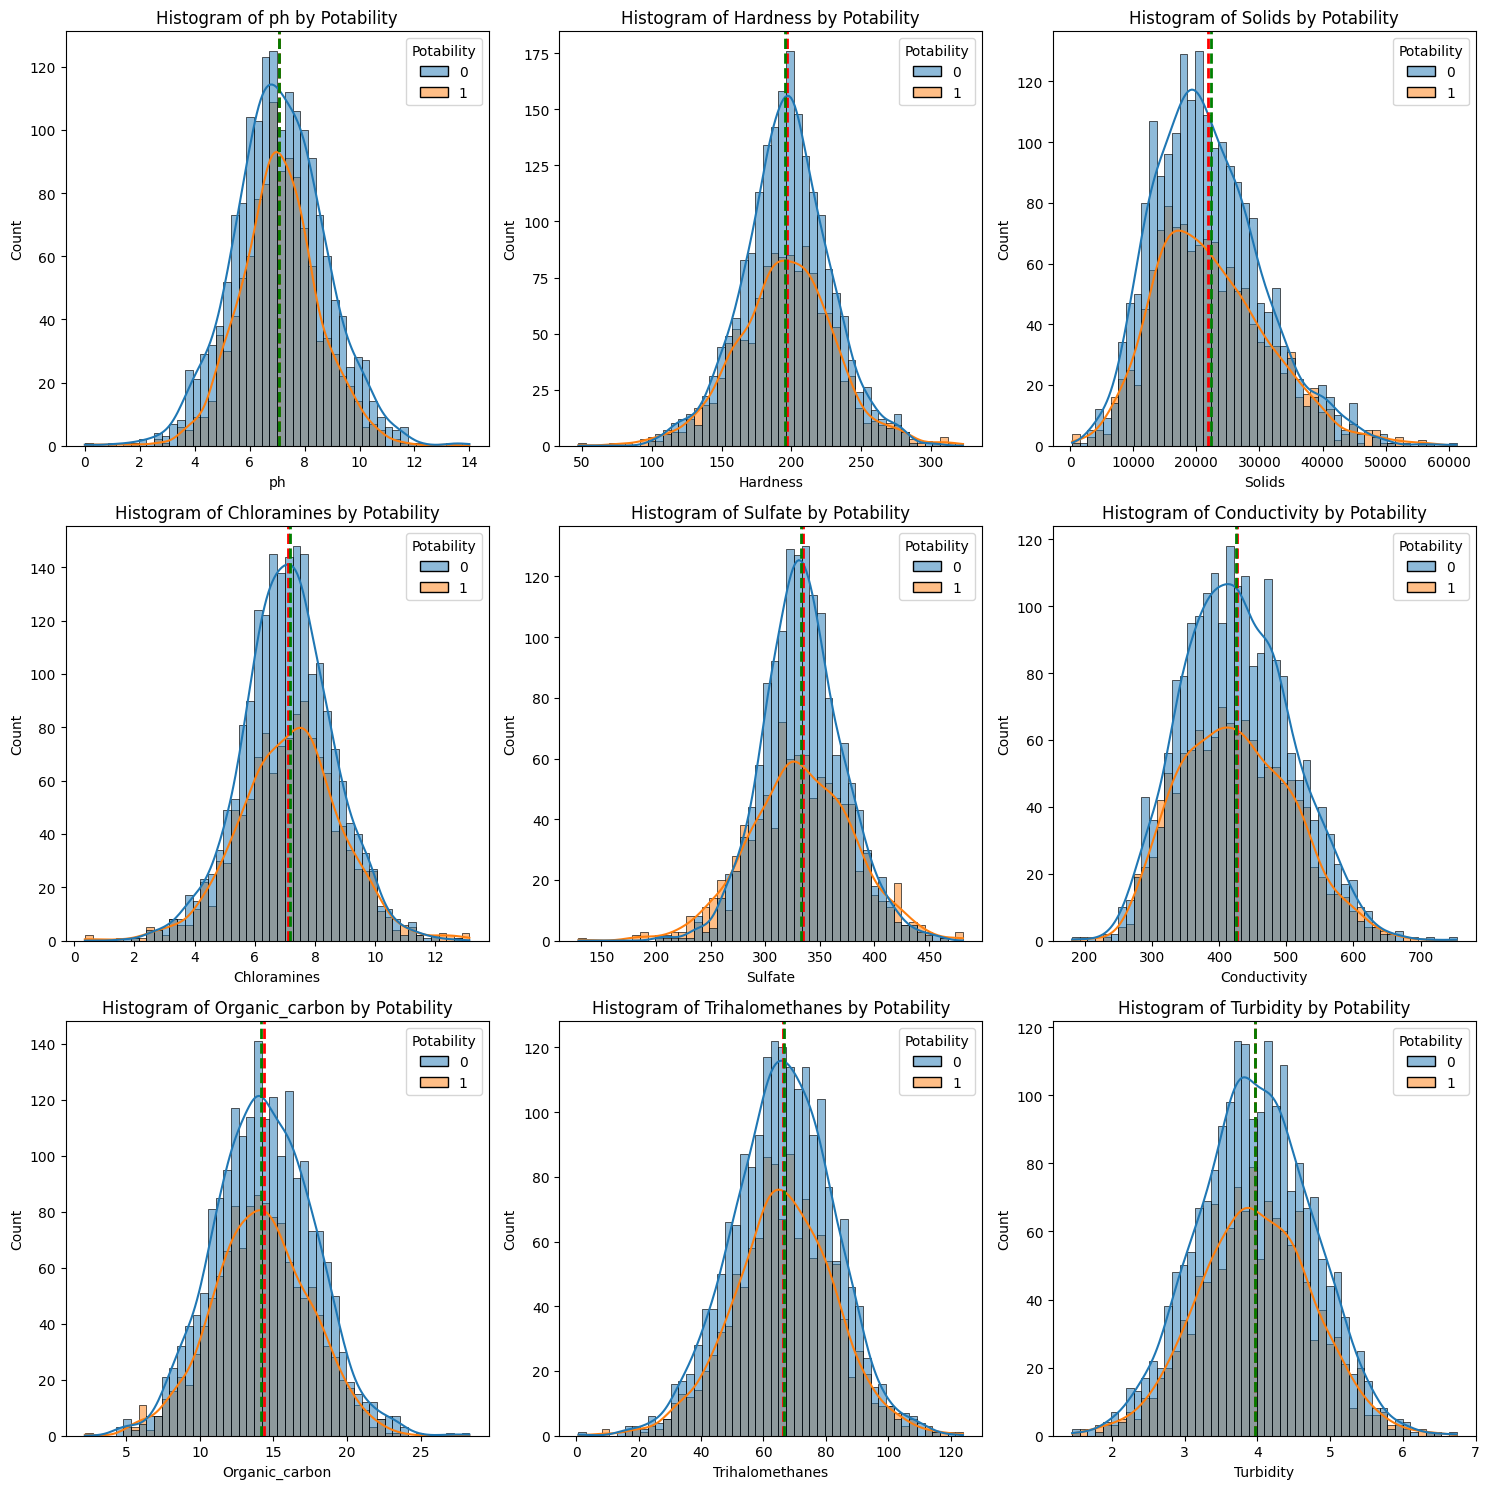

In [20]:
# Histograms with hue for Potability
plt.figure(figsize=(15, 15))

# Change the subplot grid to 3x3 to accommodate 9 plots
for i, col in enumerate(df.columns[:-1]):  # Exclude the last column (Potability)
    plt.subplot(3, 3, i + 1)  # Changed from 3x2 to 3x3
    # Removed legend_out=True as it's not a valid argument for histplot
    sns.histplot(data=df, x=col, hue='Potability', kde=True, bins=50)
    plt.title(f'Histogram of {col} by Potability')

    # Calculate the mean for the current column, grouped by 'Potability'
    mean_col_values = df.groupby('Potability')[col].mean()

    # Add the mean lines for the current column for each 'Potability' category
    # Access the mean value for not potable and potable separately
    plt.axvline(mean_col_values[0], color='red', linestyle='--', linewidth=2, label='Mean (not pot)')
    plt.axvline(mean_col_values[1], color='green', linestyle='--', linewidth=2, label='Mean (pot)') # Using a different color for clarity
    #plt.legend(loc="upper left") # Add legend here to show the mean label on each subplot



plt.tight_layout()
plt.show()

Ph√¢n ph·ªëi cho ch·∫•t r·∫Øn cho th·∫•y ƒë·ªô l·ªách d∆∞∆°ng v·ª´a ph·∫£i, v√¨ ƒëu√¥i ·ªü ph√≠a b√™n ph·∫£i d√†i h∆°n ƒëu√¥i b√™n tr√°i. ƒê·ªô d·∫´n ƒëi·ªán c≈©ng th·ªÉ hi·ªán m·ªôt sai l·ªách d∆∞∆°ng. C√°c c·ªôt c√≤n l·∫°i ch·ªâ hi·ªÉn th·ªã ƒë·ªô l·ªách t·ªëi thi·ªÉu, ƒë·ªß nh·ªè ƒë·ªÉ ph√¢n ph·ªëi c·ªßa ch√∫ng c√≥ th·ªÉ ƒë∆∞·ª£c coi l√† x·∫•p x·ªâ Gaussian.

In [21]:
# compute the skewness
df.groupby(['Potability']).skew(skipna = True)

ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
Potability                                                                      
0           0.041441 -0.021491  0.606185    -0.022291  0.118335      0.258431   
1          -0.018147 -0.046125  0.628156    -0.019584 -0.111839      0.274961   

            Organic_carbon  Trihalomethanes  Turbidity  
Potability                                              
0                 0.068941        -0.096665  -0.009198  
1                -0.051783        -0.063766  -0.005676

### e) Scatter Plots ( Bi·ªÉu ƒë·ªì ph√¢n t√°n )

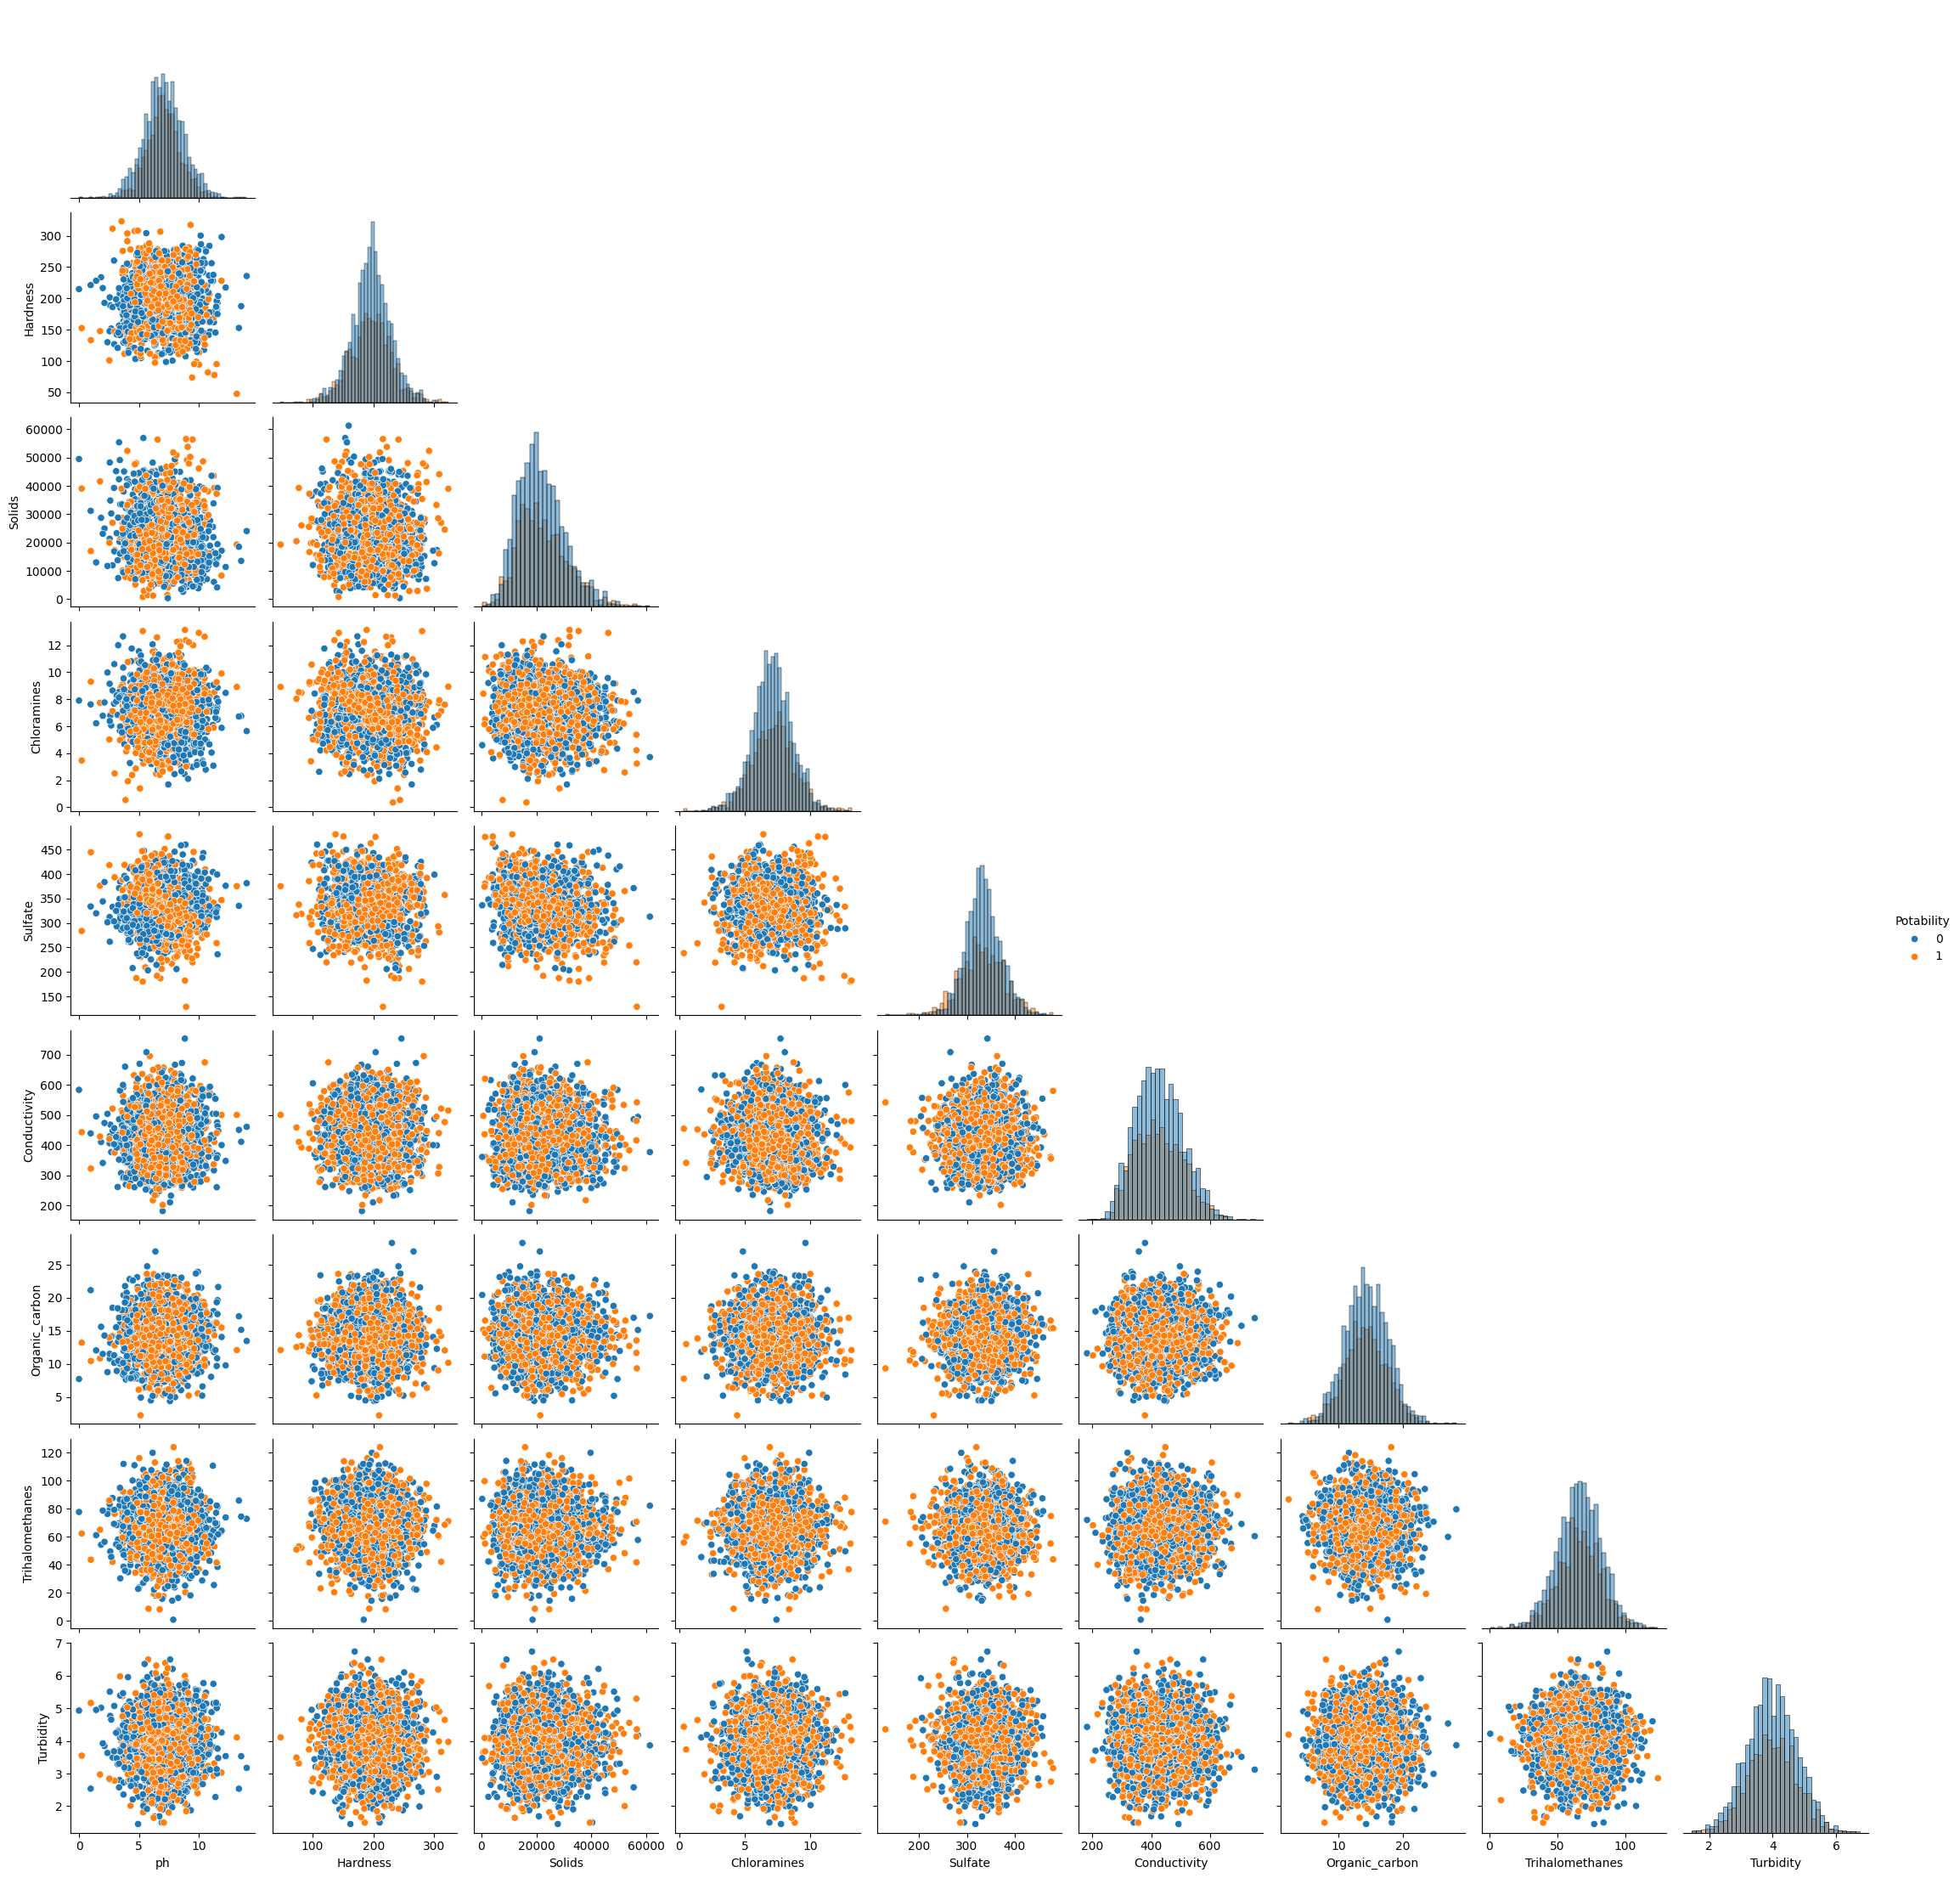

In [22]:
sns.pairplot(df, hue='Potability', corner = True, diag_kind="hist")
plt.show()

### f) T∆∞∆°ng quan gi·ªØa c√°c c·ªôt

Kh√¥ng c√≥ m·ªëi t∆∞∆°ng quan gi·ªØa m·ªôt s·ªë c·ªôt.

In [23]:
# heatmap with mask to avoid nan values
df.corr(method='pearson').style.background_gradient(cmap='coolwarm')

### g) Missing Values

In [24]:
# Nh·ªØng c·ªôt c√≥ gi√° tr·ªã thi·∫øu
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [25]:
# T·ª∑ l·ªá ph·∫ßn trƒÉm gi√° tr·ªã b·ªã thi·∫øu
missing_percentage_ph = (df['ph'].isnull().sum() / len(df)) * 100
missing_percentage_sf = (df['Sulfate'].isnull().sum() / len(df)) * 100
missing_percentage_tr = (df['Trihalomethanes'].isnull().sum() / len(df)) * 100
missing_percentage_total = (df.isnull().sum().sum() / len(df)) * 100

print(f"Porcentage of missing values in  'ph':  {missing_percentage_ph:.2f}%")
print(f"Porcentage of missing values in  'Sulfate':  {missing_percentage_sf:.2f}%")
print(f"Porcentaje  of missing values in 'Trihalomethanes':  {missing_percentage_tr:.2f}%")
print(f"Total Porcentaje  of missing values:  {missing_percentage_total:.2f}%")

Porcentage of missing values in  'ph':  14.99%
Porcentage of missing values in  'Sulfate':  23.84%
Porcentaje  of missing values in 'Trihalomethanes':  4.95%
Total Porcentaje  of missing values:  43.77%


Tr∆∞·ªõc khi x·ª≠ l√Ω c√°c gi√° tr·ªã b·ªã thi·∫øu, ch√∫ng ta c·∫ßn hi·ªÉu m√¥ h√¨nh xu·∫•t hi·ªán c·ªßa ch√∫ng.

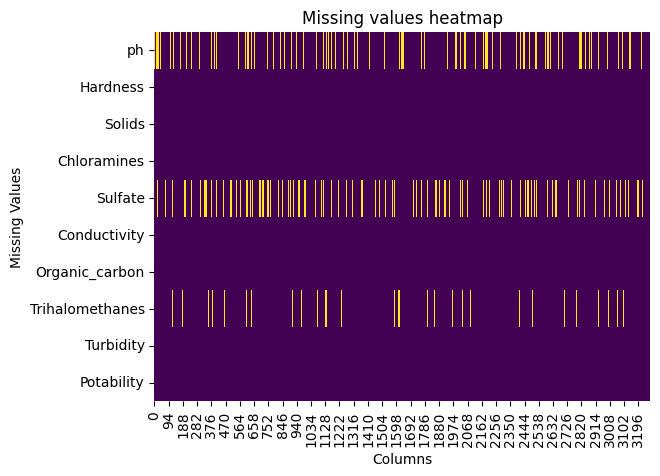

In [26]:
#set figure size
#plt.figure(figsize=(6,6))
ax = plt.axes()
sns.heatmap(df.isna().transpose(),cbar=False, cmap = "viridis",ax = ax)
plt.xlabel("Columns", fontsize = 10)
plt.ylabel("Missing Values", fontsize = 10)
#labels and titles
plt.title("Missing values heatmap")
plt.show()

C√°c gi√° tr·ªã c√≤n thi·∫øu trong pH xu·∫•t hi·ªán trong c√°c kh·ªëi, trong khi ·ªü sulfate, ch√∫ng ƒë∆∞·ª£c ph√¢n ph·ªëi ƒë·ªÅu h∆°n tr√™n c√°c h√†ng. Trong Trihalomethanes, c√°c gi√° tr·ªã b·ªã thi·∫øu ƒë∆∞·ª£c ph√¢n t√°n th∆∞a th·ªõt. Nh√¨n chung, kh√¥ng c√≥ m·∫´u r√µ r√†ng l√† r√µ r√†ng trong d·ªØ li·ªáu b·ªã thi·∫øu.

In [27]:
df.isnull().groupby(df['Potability']).sum()

ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
Potability                                                              
0           314         0       0            0      488             0   
1           177         0       0            0      293             0   

            Organic_carbon  Trihalomethanes  Turbidity  Potability  
Potability                                                          
0                        0              107          0           0  
1                        0               55          0           0

### h) Outliers

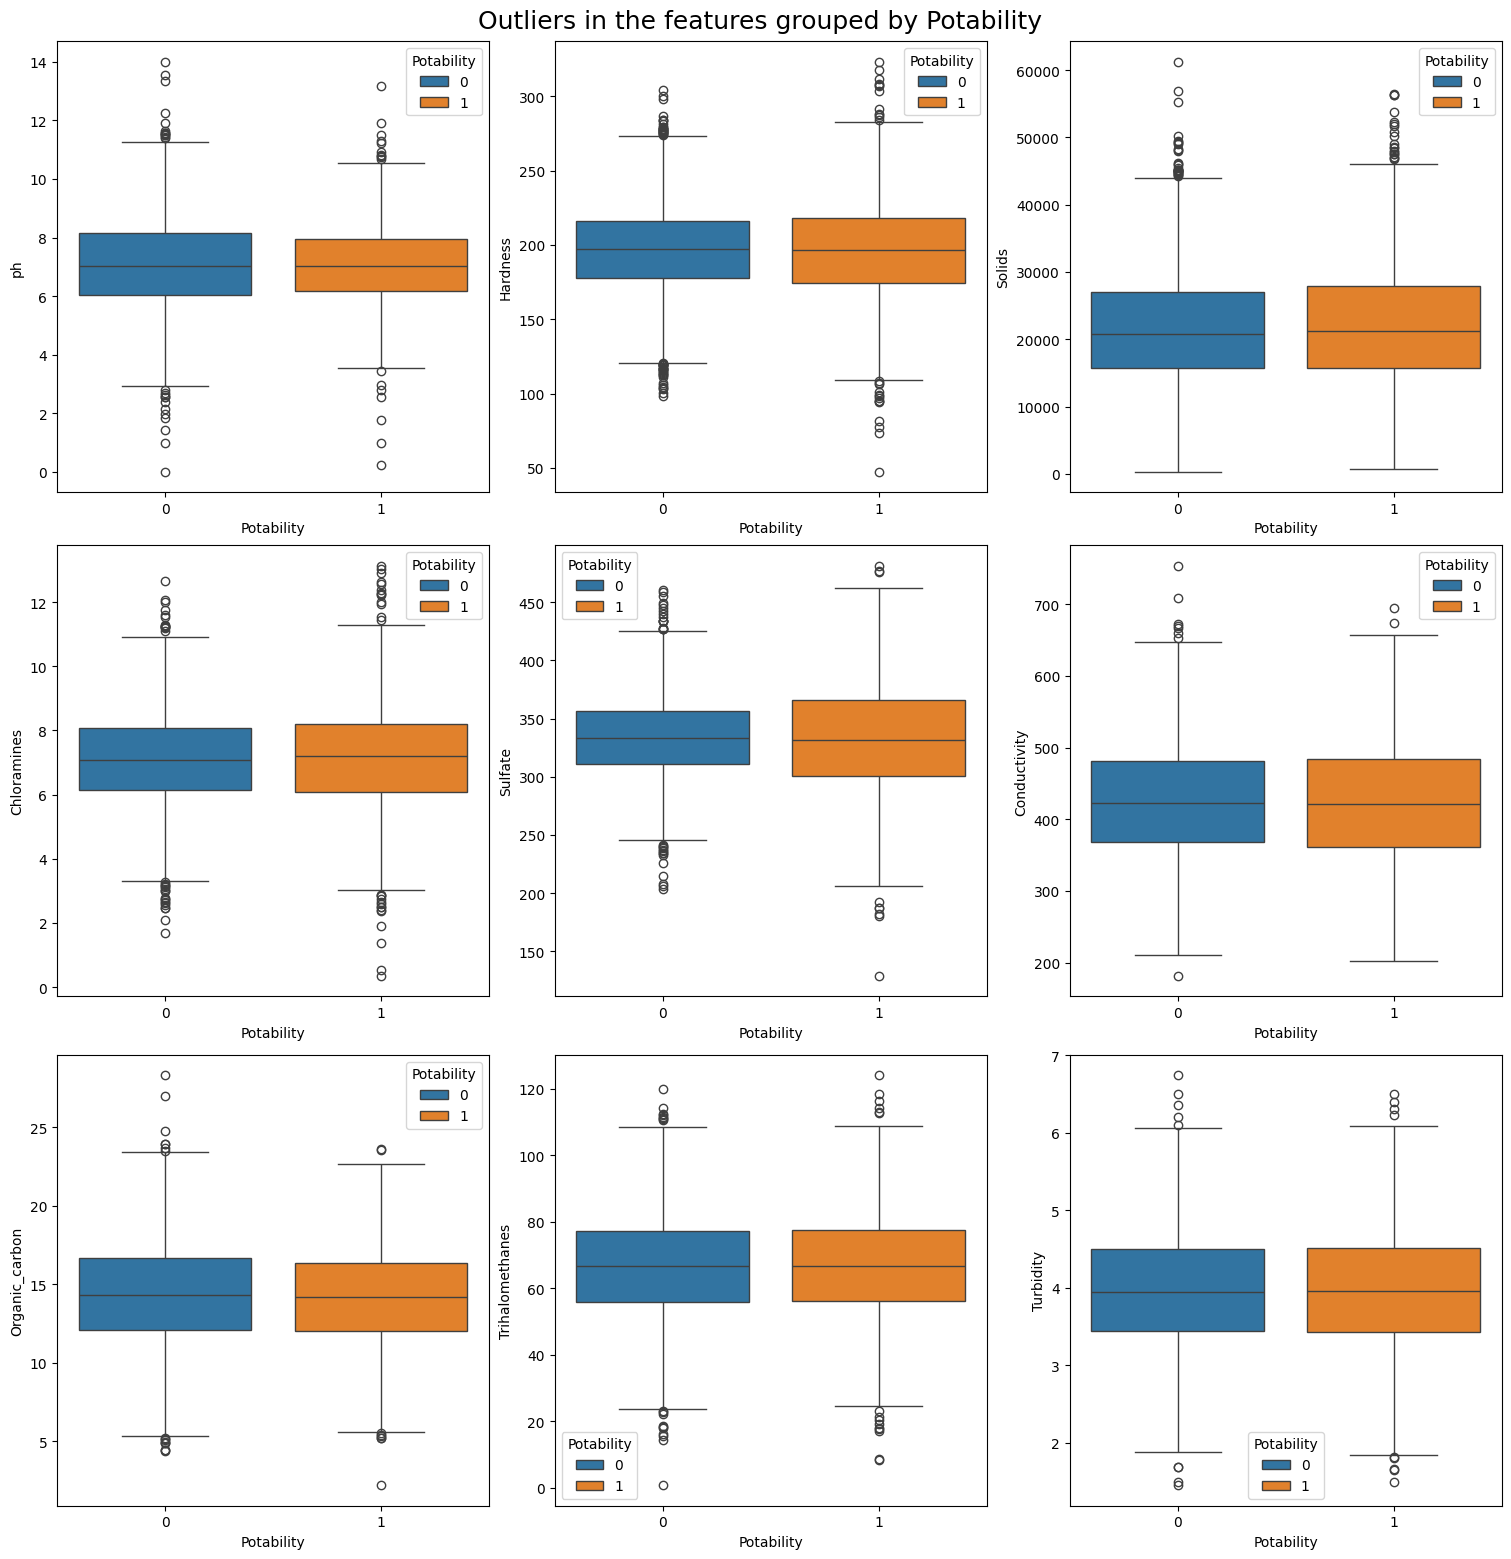

In [28]:
# Change the subplot grid to 4x3 to accommodate 10 plots
fig, axes = plt.subplots(4, 3, constrained_layout=True, figsize=(15, 20)) # Increased figure size for better readability
axes = axes.flatten()

# List of columns to plot (excluding the duplicate 'Conductivity')
columns_to_plot = ["ph", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]

# Loop through the columns and plot
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x="Potability", y=col, data=df, orient='v',  ax=axes[i], hue = "Potability" )

# Hide any unused subplots (since 10 < 12)
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle(" Outliers in the features grouped by Potability", fontsize = 18)
plt.show() # Add plt.show() to display the plots

 ƒê·ªô c·ª©ng l√† c√°c c·ªôt c√≥ s·ªë l∆∞·ª£ng ngo·∫°i l·ªá nh·∫•t

In [29]:
# Count outliers
def outliers(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
  return outliers

In [30]:
outliers_df = outliers(df)
pd.DataFrame({"Count.Outliers": outliers_df.sum(),
            "Pct.Outliers %": (outliers_df.sum() * 100/ len(df)).round(2)})

Count.Outliers  Pct.Outliers %
ph                           46            1.40
Hardness                     83            2.53
Solids                       47            1.43
Chloramines                  61            1.86
Sulfate                      41            1.25
Conductivity                 11            0.34
Organic_carbon               25            0.76
Trihalomethanes              33            1.01
Turbidity                    19            0.58
Potability                    0            0.00

In [31]:
print(f" T·ªïng ph·∫ßn trƒÉm c·ªßa ngo·∫°i l·ªá: {((outliers_df.sum().sum()/ len(df)) * 100):.2f} %")

 T·ªïng ph·∫ßn trƒÉm c·ªßa ngo·∫°i l·ªá: 11.17 %


B·ªô d·ªØ li·ªáu n√†y c√≥ 43,8 % gi√° tr·ªã b·ªã thi·∫øu v√† 11,17 % c√°c ngo·∫°i l·ªá.

B·ªüi v√¨ s·ªë l∆∞·ª£ng ngo·∫°i l·ªá nh·ªè h∆°n s·ªë l∆∞·ª£ng c√°c gi√° tr·ªã b·ªã thi·∫øu, tr∆∞·ªõc ti√™n t√¥i ƒë·ªëi ph√≥ v·ªõi c√°c ngo·∫°i l·ªá.

## 3) Ti·ªÅn x·ª≠ l√Ω

### a) Gi·ªõi h·∫°n c√°c ngo·∫°i l·ªá v·ªõi ph·∫°m vi li√™n v√πng (IQR)

In [32]:
# apply cap with IQR
def cap_outliers_iqr(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = ((df < lower_bound) | (df > upper_bound))
  return np.clip(df, lower_bound, upper_bound)

df_cap_iqr = df.groupby('Potability').transform(cap_outliers_iqr)

### b) D·ªØ li·ªáu ri√™ng bi·ªát th√†nh c√°c t√≠nh nƒÉng v√† m·ª•c ti√™u

In [33]:
# separate data
X= df_cap_iqr
y=df["Potability"]

### c) T√°ch d·ªØ li·ªáu v√† √°p d·ª•ng robust scaler


Em ch·ªçn c√°c K-Newest Neighbors (KNN) ƒë·ªÉ ƒë∆∞a ra c√°c gi√° tr·ªã b·ªã thi·∫øu. ƒê·ªÉ l√†m ƒëi·ªÅu n√†y, tr∆∞·ªõc ti√™n em ƒë√£ chia t·ª∑ l·ªá d·ªØ li·ªáu, v√¨ KNN nh·∫°y c·∫£m v·ªõi quy m√¥ c·ªßa c√°c t√≠nh nƒÉng. Bi·∫øn m·ª•c ti√™u trong ph√¢n t√≠ch n√†y l√† kh·∫£ nƒÉng. T√¥i ƒë√£ s·ª≠ d·ª•ng m√°y nh√¢n m·∫°nh m·∫Ω v√¨ n√≥ quy m√¥ c√°c t√≠nh nƒÉng s·ª≠ d·ª•ng c√°c s·ªë li·ªáu th·ªëng k√™ m·∫°nh m·∫Ω cho c√°c ngo·∫°i l·ªá.

In [34]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler with Robust Scaler
scaler = RobustScaler( with_scaling=True, with_centering = True, quantile_range=(25.0, 75.0))

# scaler fit and transform
X_train_scaled = scaler.fit_transform(X_train, y=None)
X_test_scaled = scaler.fit_transform(X_test, y=None)

### d) K-Nearest Neighbor (KNN) C·∫Øt b·ªè c√°c gi√° tr·ªã b·ªã thi·∫øu

In [35]:
# Create an instance of KNNImputer
imputer = KNNImputer(n_neighbors=10, weights="uniform") # default values for weights = uniform and metric = nan_euclidean

# Apply KNN imputation, fit and transform
X_train_trf = imputer.fit_transform(X_train_scaled)
X_test_trf = imputer.transform(X_test_scaled)

# Verify that missing values are gone
print("\nMissing values after KNN imputation:")
print(sum(np.isnan(X_train_trf)))



Missing values after KNN imputation:
[0 0 0 0 0 0 0 0 0]


In [36]:
print(sum(np.isnan(X_test_trf)))

[0 0 0 0 0 0 0 0 0]


## 4) Support Vector Machin (SVM)

### a) Linear kernel

In [37]:
# Create the model: linear model
linear_model = SVC(kernel='linear',C=0.5)

# Train the model with the training data
linear_model_train = linear_model.fit(X_train_trf, y_train)

# Predict with the test data
y_pred_linear = linear_model_train.predict(X_test_trf)

In [38]:
# Calculating the accuracy of the linear model
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Linear SVM Accuracy: {accuracy_linear:.2f}")

# Displaying confusion matrix and classification report for the linear model
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)
class_report_linear = classification_report(y_test, y_pred_linear)

print("\nConfusion Matrix (Linear SVM):")
print(conf_matrix_linear)
print("\nClassification Report (Linear SVM):")
print(class_report_linear)

Linear SVM Accuracy: 0.63

Confusion Matrix (Linear SVM):
[[412   0]
 [244   0]]

Classification Report (Linear SVM):
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



SVM tuy·∫øn t√≠nh r√µ r√†ng l√† kh√¥ng hi·ªáu qu·∫£, v√¨ n√≥ kh√¥ng x√°c ƒë·ªãnh ƒë∆∞·ª£c b·∫•t k·ª≥ t√≠ch c·ª±c th·ª±c s·ª± n√†o.

## b) Radial Basic Function (RBF) kernel

In [39]:
# Create a RBF model classifiers
rbf_model = SVC(kernel='rbf', C=0.1,class_weight='balanced', gamma = 0.1)

# Train the model with the training data
rbf_model_train = rbf_model.fit(X_train_trf, y_train)

# Predict with the test  and train
y_test_pred_rbf = rbf_model_train.predict(X_test_trf)
y_train_pred_rbf = rbf_model_train.predict(X_train_trf)

In [40]:
# ƒê√°nh gi√° ph√¢n lo·∫°i

svm_classification = classification_report(y_test, y_test_pred_rbf)
print(svm_classification)

              precision    recall  f1-score   support

           0       0.68      0.83      0.75       412
           1       0.54      0.34      0.42       244

    accuracy                           0.65       656
   macro avg       0.61      0.58      0.58       656
weighted avg       0.63      0.65      0.62       656



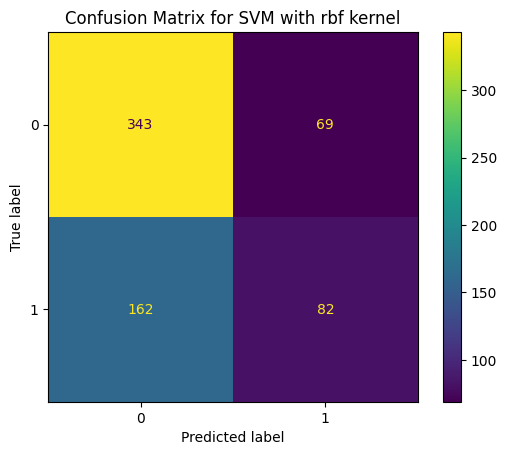

In [41]:
# T√≠nh to√°n ma tr·∫≠n nh·∫ßm l·∫´n
cm_svm = confusion_matrix(y_test, y_test_pred_rbf)

# Hi·ªÉn th·ªã ma tr·∫≠n nh·∫ßm l·∫´n
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=[0, 1])
disp.plot()
plt.title("Confusion Matrix for SVM with rbf kernel")
plt.show()

M√¥ h√¨nh n√†y ho·∫°t ƒë·ªông t·ªët h∆°n tuy·∫øn t√≠nh. S·ªë l∆∞·ª£ng d∆∞∆°ng t√≠nh th·ª±c s·ª± l√† 82 v√† c√°c ti√™u c·ª±c sai 69. D∆∞·ªõi ƒë√¢y t√¥i hi·ªÉn th·ªã c√°c ƒë∆∞·ªùng cong x√°c nh·∫≠n gi√∫p t√¥i ch·ªçn c√°c gi√° tr·ªã t·ªët nh·∫•t c·ªßa c√°c si√™u √¢m.


#### ƒêi·ªÅu ch·ªânh c√°c si√™u √¢m

Best C value based on testing accuracy: 0.1
Corresponding training accuracy: 0.69
Corresponding testing accuracy: 0.65


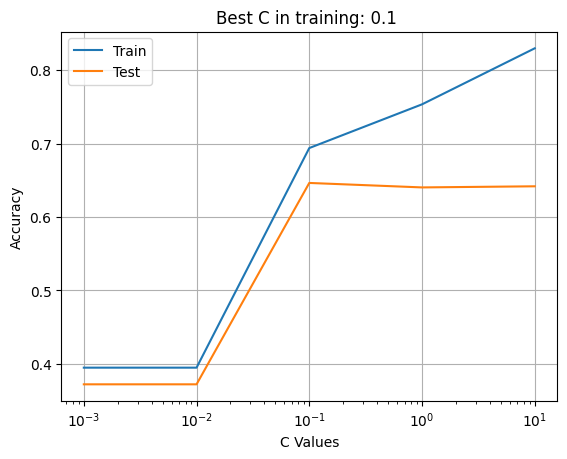

In [42]:
# list to record the accuracy
training_accuracy = []
testing_accuracy = []

# list to record the error
training_error = []
testing_error = []

# C Hyperparameter - Define a list of specific C values
C_param = [0.001, 0.01, 0.1, 1.0, 10.0]


for C_value in C_param:
    # Create the SVC model with the current C_value
    rbf_model = SVC(kernel='rbf', C=C_value,class_weight='balanced')
    rbf_model_train = rbf_model.fit(X_train_trf, y_train)

    # Appending the Accuracy Score - Use scaled data for evaluation
    training_accuracy.append(rbf_model_train.score(X_train_trf, y_train))
    testing_accuracy.append(rbf_model_train.score(X_test_trf, y_test))

    # Appending the Error Score
    training_error.append(1 - rbf_model_train.score(X_train_trf, y_train))
    testing_error.append(1 - rbf_model_train.score(X_test_trf, y_test))

# Find the best C based on testing accuracy
best_C_index = np.argmax(testing_accuracy)
best_C = C_param[best_C_index]

print(f"Best C value based on testing accuracy: {best_C}")
print(f"Corresponding training accuracy: {training_accuracy[best_C_index]:.2f}")
print(f"Corresponding testing accuracy: {testing_accuracy[best_C_index]:.2f}")



def plot_log(X_values, train_values, test_values, Xlabel, ylabel, title):
    plt.semilogx(X_values, train_values, X_values, test_values)
    plt.xlabel(Xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(("Train", "Test"))
    plt.grid()
    plt.show()


plot_log(C_param, training_accuracy, testing_accuracy, "C Values", "Accuracy", title=f"Best C in training: {best_C:1g} ")

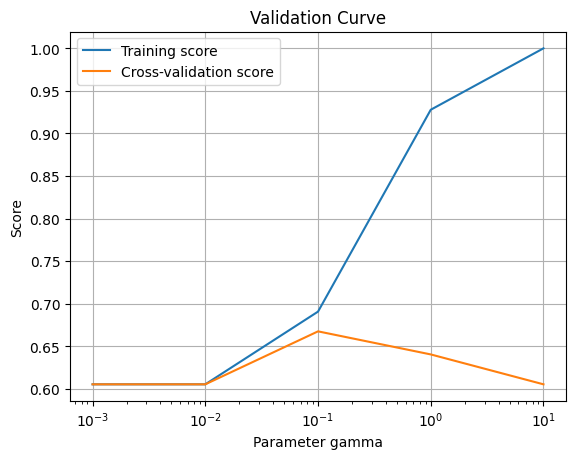

In [43]:
# Example: Validation curve for SVC

# gamma values
gamma_param = [0.001, 0.01, 0.1, 1.0, 10.0]

# compute validation curve
train_scores, test_scores = validation_curve(
     SVC(kernel="rbf"),
     X_train_trf, y_train,
     param_name="gamma",
     param_range = gamma_param,
     scoring="accuracy",
     cv=5
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.semilogx(gamma_param, train_scores_mean, label="Training score")
plt.semilogx(gamma_param, test_scores_mean, label="Cross-validation score")
plt.title("Validation Curve")
plt.xlabel("Parameter gamma")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()


For $C > 0.1$ the training score is high and the validation score is low, the estimator is overfitting. For $ C < 10^{-2}$ the training score and the validation score are both low, the estimator will be underfitting. The best value is $C = 0.1$. From the validation curve for $\gamma$ we also have the best values $\gamma = 0.1$

Next, the KDE plot illustrates the probability distributions of the actual and predicted values. There is a visible gap between the curves  where potability equals 1. This gap indicate that the model‚Äôs predicted values differ noticeably from the true values for the potable class  and that the model isn't capturing the underlying distribution well for that class, signaling room for improvement.

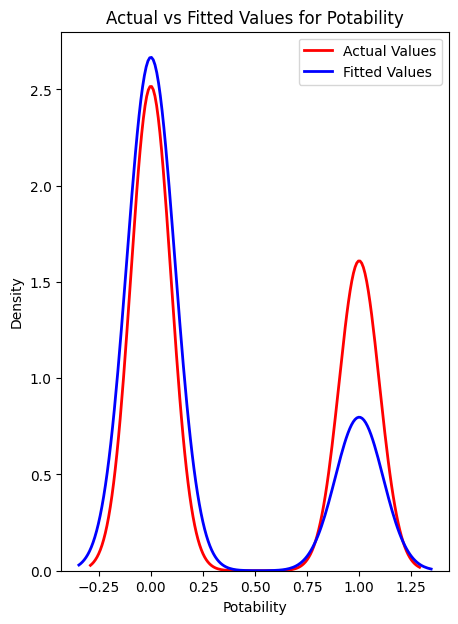

In [44]:
plt.figure(figsize=(5, 7))

# Plot actual values
ax = sns.kdeplot(y, color="r", label="Actual Values", linewidth=2)

# Plot predicted values
sns.kdeplot(y_test_pred_rbf, color="b", label="Fitted Values", ax=ax, linewidth=2)

# Add labels and title
plt.title('Actual vs Fitted Values for Potability')
plt.xlabel('Potability')
plt.ylabel('Density')

# Add legend with location specified
plt.legend(loc='upper right')

# Show and close plot
plt.show()
plt.close()

In [45]:
model = SVC(kernel='rbf', C=0.1,class_weight='balanced', gamma = 0.1, probability=True)
# Train the model with the training data
model.fit(X_train_trf, y_train)
proba_pred = model.predict_proba(X_test_trf)

# Probability
prob_pot_svm = pd.DataFrame(proba_pred, columns=['P(y=0|X)', 'P(y=1|X)'])
prob_pot_svm.head(15)

P(y=0|X)  P(y=1|X)
0   0.749276  0.250724
1   0.702862  0.297138
2   0.689033  0.310967
3   0.545506  0.454494
4   0.655909  0.344091
5   0.401130  0.598870
6   0.573404  0.426596
7   0.453974  0.546026
8   0.457643  0.542357
9   0.688888  0.311112
10  0.688586  0.311414
11  0.769363  0.230637
12  0.558456  0.441544
13  0.732505  0.267495
14  0.377707  0.622293

## 5) Random Forest

With the aim of improving model performance, I have implemented a Random Forest classifier as an alternative to the SVM

Standarization or normalization is not needed for tree bases models. Therefore, I just consider the missing values imputation.

In [46]:
# Create an instance of KNNImputer without scale
imputer_knn = KNNImputer(n_neighbors=10, weights="uniform") # default values for weights = uniform and metric = nan_euclidean

# Apply KNN imputation, fit and transform
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

# Verify that missing values are gone
print("\nMissing values after KNN imputation:")
print(sum(np.isnan(X_train_imp)))


Missing values after KNN imputation:
[0 0 0 0 0 0 0 0 0]


#### Tuning the hyperparameters
Looking for the best model for different values of the hyperparameters.

In [47]:
param_dist = {'n_estimators': randint(5,25),
              'max_depth': randint(1,30)}

# Create a random forest classifier
rf = RandomForestClassifier(random_state = 42,criterion='gini')

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train_imp, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 14, 'n_estimators': 13}


In [48]:
# Construct the model  with the best hyperparameters
rf_model = RandomForestClassifier(random_state = 42,  **rand_search.best_params_)

# Fit model with the training data.
rf_model.fit(X_train_imp, y_train)

# prediction of the rf model
y_pred =rf_model.predict(X_test_imp)
# Calculate the mean absolute error of your Random Forest model on the validation data
rf_val_mae = mean_absolute_error(y_test, y_pred)

In [49]:
# Evaluation of the classification
rf_classification = classification_report(y_test, y_pred)
print(rf_classification)


              precision    recall  f1-score   support

           0       0.69      0.88      0.77       412
           1       0.62      0.34      0.44       244

    accuracy                           0.68       656
   macro avg       0.66      0.61      0.61       656
weighted avg       0.67      0.68      0.65       656



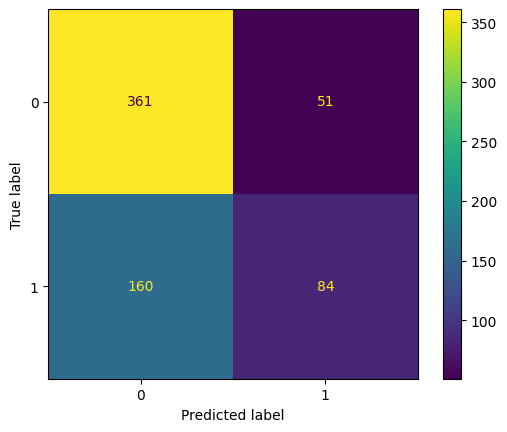

In [50]:
# Generate predictions with the best model
y_pred_set = best_rf.predict(X_test_imp)

# Create the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm_rf).plot();

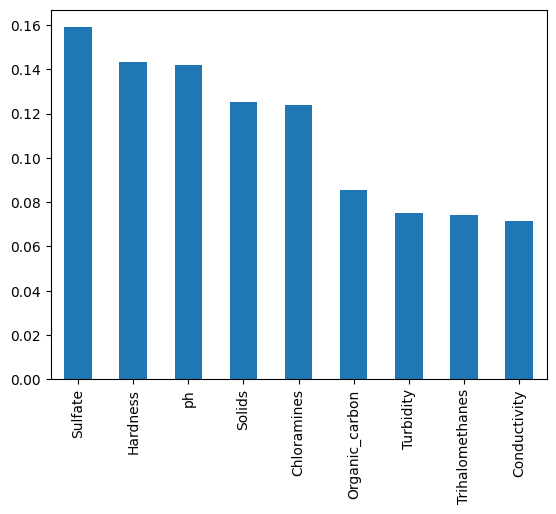

In [51]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [52]:
# Probability
prob_pot_rf = pd.DataFrame(rf_model.predict_proba(X_test_imp), columns=['P(y=0|X)', 'P(y=1|X)'])
prob_pot_rf.head(15)

P(y=0|X)  P(y=1|X)
0   0.644328  0.355672
1   0.693056  0.306944
2   0.713365  0.286635
3   0.523293  0.476707
4   0.561052  0.438948
5   0.153846  0.846154
6   0.445787  0.554213
7   0.672573  0.327427
8   0.499693  0.500307
9   0.697894  0.302106
10  0.573054  0.426946
11  0.546318  0.453682
12  0.417611  0.582389
13  0.479476  0.520524
14  0.657369  0.342631

In [53]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import pickle

# ƒê·ªçc d·ªØ li·ªáu
df = pd.read_csv("water_potability.csv")

# X·ª≠ l√Ω thi·∫øu d·ªØ li·ªáu
df = df.dropna()

# Chia features v√† labels
X = df.drop("Potability", axis=1)
y = df["Potability"]

# Scale d·ªØ li·ªáu
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hu·∫•n luy·ªán m√¥ h√¨nh
model = RandomForestClassifier()
model.fit(X_train, y_train)

# L∆∞u m√¥ h√¨nh v√† scaler v√†o file
with open("model.pkl", "wb") as f:
    pickle.dump((model, scaler), f)

print("‚úÖ M√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c hu·∫•n luy·ªán v√† l∆∞u th√†nh c√¥ng.")


‚úÖ M√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c hu·∫•n luy·ªán v√† l∆∞u th√†nh c√¥ng.


## 6) K·∫øt lu·∫≠n

* Gi·ªØa hai m√¥ h√¨nh, SVM ƒë√£ ƒë·∫°t ƒë∆∞·ª£c ƒë·ªô ch√≠nh x√°c c·ªßa th·ª≠ nghi·ªám l√† 0,65, trong khi Random Forest ho·∫°t ƒë·ªông t·ªët h∆°n v·ªõi ƒë·ªô ch√≠nh x√°c c·ªßa th·ª≠ nghi·ªám l√† 0,70.


*  N∆∞·ªõc b·ªã √¥ nhi·ªÖm c√≥ nguy c∆° nghi√™m tr·ªçng, nh∆∞ b·ªánh th·∫≠m ch√≠ ƒë√£ ch·∫øt. Do ƒë√≥, vi·ªác gi·∫£m d∆∞∆°ng t√≠nh gi·∫£ trong m√¥ h√¨nh l√† r·∫•t quan tr·ªçng. So v·ªõi m√¥ h√¨nh SVM, m√¥ h√¨nh RF ƒë√£ gi·∫£m s·ªë l∆∞·ª£ng d∆∞∆°ng t√≠nh gi·∫£ t·ª´ 69 xu·ªëng c√≤n 18, ƒë√¢y l√† m·ªôt s·ª± c·∫£i thi·ªán ƒë√°ng k·ªÉ.


## 7) T√†i li·ªáu tham kh·∫£o

1. [CF_Blog](https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/)
2. [Outliers](https://stackoverflow.com/questions/39068214/how-to-count-outliers-for-all-columns-in-python)
3. [Normalization-Standarization](https://pmc.ncbi.nlm.nih.gov/articles/PMC3489534/#:~:text=We%20suggest%20that%20normalization%20be,imputation%2C%20significance%20analysis%20and%20visualization)
4. [Normalize after or before imputation](https://stats.stackexchange.com/questions/214728/should-data-be-normalized-before-or-after-imputation-of-missing-data)
5. [Medium_SVM](https://medium.com/data-science/svm-support-vector-machine-for-classification-710a009f6873)

In [55]:
!wget -q -O - https://loca.lt/mytunnelpassword

35.194.201.238

In [56]:
!pip install streamlit
!npm install -g localtunnel


‚†ô‚†π‚†∏‚†º‚†¥‚†¶‚†ß‚†á‚†è‚†ã‚†ô‚†π‚†∏‚†º‚†¥‚†¶‚†ß‚†á‚†è‚†ã‚†ô‚†π‚†∏‚†º‚†¥‚†¶
changed 22 packages in 2s
‚†¶
‚†¶3 packages are looking for funding
‚†¶  run `npm fund` for details
‚†¶

In [74]:
# 1. Import th∆∞ vi·ªán
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
import pickle

# 2. ƒê·ªçc d·ªØ li·ªáu
df = pd.read_csv("water_potability.csv")
df.dropna(inplace=True)  # Lo·∫°i b·ªè d·ªØ li·ªáu thi·∫øu

# 3. Chia d·ªØ li·ªáu
X = df.drop("Potability", axis=1)
y = df["Potability"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Chu·∫©n h√≥a d·ªØ li·ªáu v·ªõi RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Hu·∫•n luy·ªán m√¥ h√¨nh
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# 6. D·ª± ƒëo√°n v√† ƒë√°nh gi√°
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))

# 7. L∆∞u m√¥ h√¨nh v√† scaler
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


Accuracy: 0.652605459057072


In [75]:
import streamlit as st
import pickle
import numpy as np

# Load m√¥ h√¨nh v√† scaler
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

# Giao di·ªán web
st.title("üîç D·ª± ƒëo√°n ch·∫•t l∆∞·ª£ng n∆∞·ªõc")

ph = st.number_input("pH", min_value=0.0, max_value=14.0, value=7.0)
hardness = st.number_input("ƒê·ªô c·ª©ng", min_value=0.0, value=150.0)
solids = st.number_input("Ch·∫•t r·∫Øn", min_value=0.0, value=10000.0)
chloramines = st.number_input("Chloramines", min_value=0.0, value=7.0)
sulfate = st.number_input("Sulfate", min_value=0.0, value=300.0)
conductivity = st.number_input("ƒê·ªô d·∫´n ƒëi·ªán", min_value=0.0, value=400.0)
organic_carbon = st.number_input("Carbon h·ªØu c∆°", min_value=0.0, value=10.0)
trihalomethanes = st.number_input("Trihalomethanes", min_value=0.0, value=70.0)
turbidity = st.number_input("ƒê·ªô ƒë·ª•c", min_value=0.0, value=3.0)

# D·ª± ƒëo√°n
if st.button("D·ª± ƒëo√°n"):
    input_data = np.array([[ph, hardness, solids, chloramines, sulfate, conductivity,
                            organic_carbon, trihalomethanes, turbidity]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)

    if prediction[0] == 1:
        st.success("‚úÖ N∆∞·ªõc c√≥ th·ªÉ u·ªëng ƒë∆∞·ª£c!")
    else:
        st.error("‚ùå N∆∞·ªõc KH√îNG an to√†n ƒë·ªÉ u·ªëng!")


2025-07-24 13:30:37.822 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 13:30:37.825 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 13:30:37.826 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 13:30:37.829 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 13:30:37.830 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 13:30:37.831 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 13:30:37.834 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 13:30:37.835 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501


‚†ô

‚†π‚†∏‚†º‚†¥‚†¶‚†ß‚†á‚†è
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.194.201.238:8501

‚†ã‚†ô‚†π‚†∏‚†º‚†¥‚†¶your url is: https://violet-bottles-raise.loca.lt
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feat